In [2]:
import os

import numpy as np

from ER_MRL.utils import plot_observations_context

2023-10-12 11:17:21.844884: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 11:17:21.846145: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 11:17:21.873659: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 11:17:21.874236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 11:17:22.304541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
# Experiment parameters
env_id = 'Swimmer-v4'
nb_seeds = 3
seed_idx = 1
training_timesteps = 1_000_000
models = ['PPO', 'RES_PPO']

# Reservoir hyperparameters
best_params = {'iss': 1.4303466460332108, 'sr': 1.0177517372871698, 'lr': 0.2587104250497556, 'units': 100}
reset_res = True
skip_c = False

In [5]:
# Saving directories to load data 
h_test = 'CPG_test'

exp_name = f"{env_id}_{h_test}"
logdir = f"logs/{exp_name}/"
models_dir = f"models/{exp_name}/"
files_dir = f"{h_test}_files"

In [9]:
# Check all the data is available and has the desired shape
for model_name in models:
    obs_file_name = f"{model_name}_obs_seed_{seed_idx}.npy"
    obs_history = np.load(os.path.join(files_dir, obs_file_name))
    print(f"\n{model_name}")
    print(f"obs shape: {obs_history.shape}")
    if model_name.startswith('RES'):
        context_filename = f"{model_name}_context_seed_{seed_idx}.npy"
        context_history = np.load(os.path.join(files_dir, context_filename))
        RES_action_filname = f"{model_name}_res_ppo_action_seed_{seed_idx}.npy"
        RES_action_file = np.load(os.path.join(files_dir, RES_action_filname))
        print(f"ctx shape: {context_history.shape}")
        print(f"action shape: {RES_action_file.shape}")
    else:
        PPO_action_filname = f"{model_name}_ppo_action_seed_{seed_idx}.npy"
        PPO_action_file = np.load(os.path.join(files_dir, PPO_action_filname))
        print(f"action shape: {PPO_action_file.shape}")

dones = np.load(os.path.join(files_dir, "dones.npy"))
print(f"\n{dones.shape = }")


PPO
obs shape: (1001472, 8)
action shape: (1001472, 2)

RES_PPO
obs shape: (1001472, 8)
ctx shape: (1001472, 100)
action shape: (1001472, 2)

dones.shape = (1001,)


In [10]:
# Define the observations name for the specific environment
obs_idx_names = ['a_front_tip', 
                 'a_first_rotor',
                 'a_second_rotor',
                 'v_tip_x_axis',
                 'v_tip_y_axis',
                 'a_v_front_tip',
                 'a_v_first_rotor',
                 'a_v_second_rotor'
]

# Plot the results

Here we plot the reservoir context of ER-MRL agents and the observations of RL agents at the same stage of the training 

Episode 0


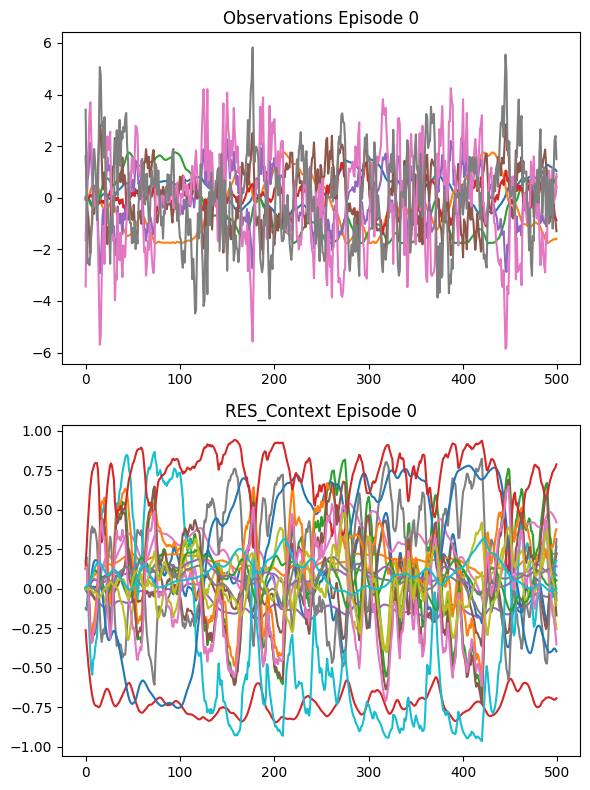

Episode 100


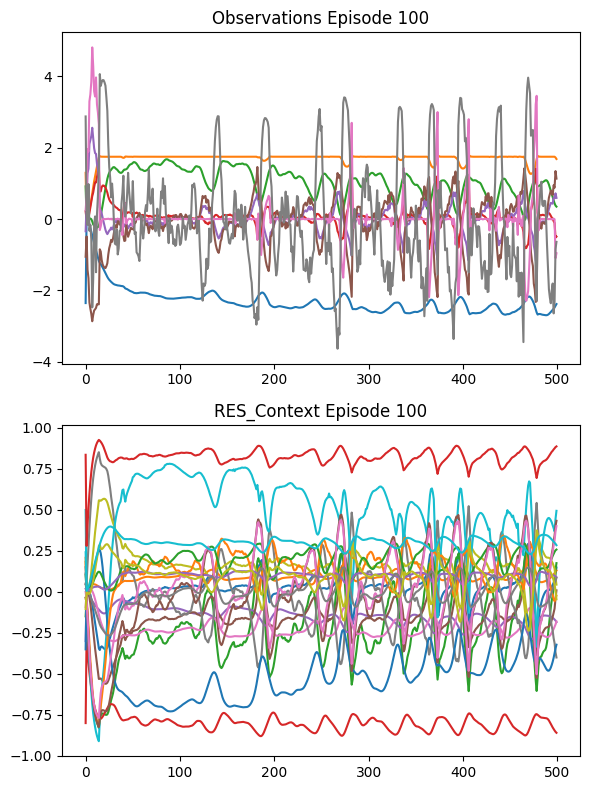

Episode 200


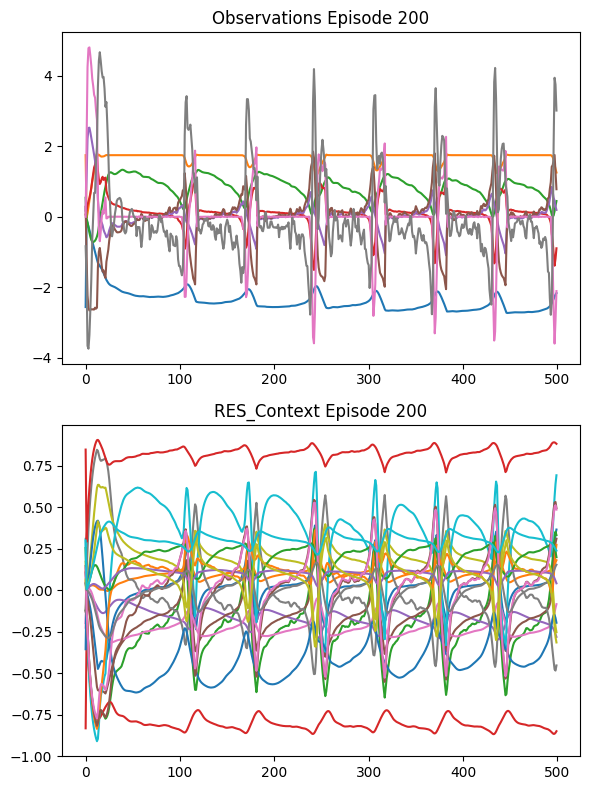

Episode 300


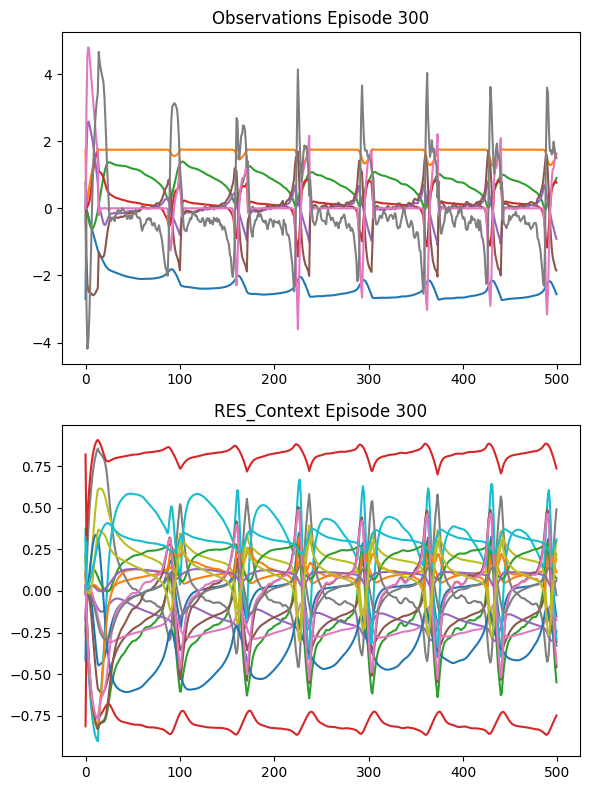

Episode 400


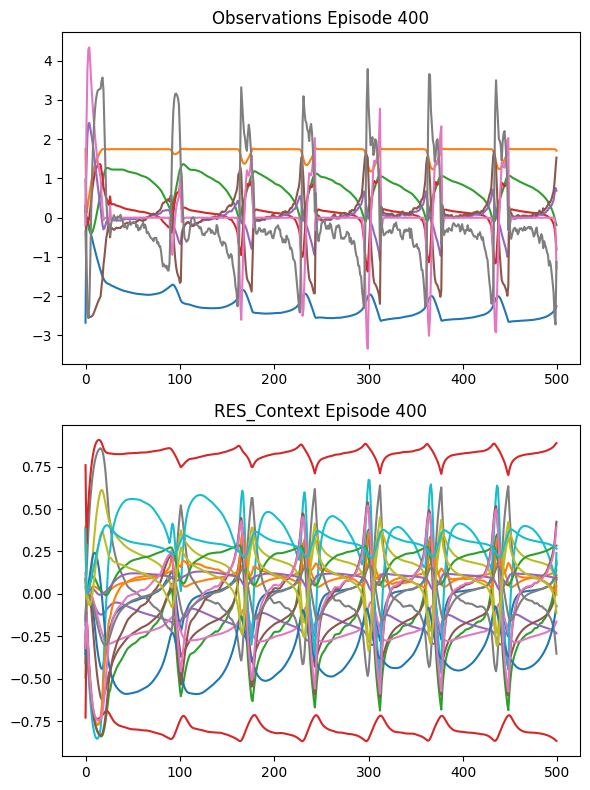

Episode 500


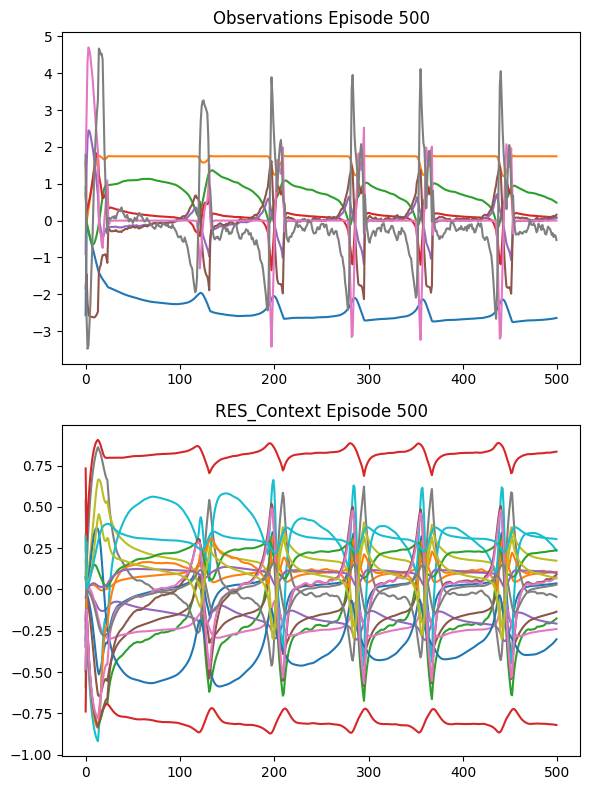

In [49]:
for episode_id in range(0, 600, 100):
    print(f"Episode {episode_id}")
    plot_observations_context(dones, 
                              obs_history, 
                              obs_idx_names, 
                              context_history, 
                              episode_id, 
                              ep_timesteps=500, 
                              legend=False,
                                figsize=(6,8))
    
    # Uncomment the following line if you want to observe the fourier transform of these plots
    # plot_episode_fft(dones, obs_history, context_history, episode_id)